In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions import *

In [2]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


**Inspecting Dataset**

In [3]:
df.shape

(52444, 14)

Check for null

In [4]:
df.isnull().mean().sort_index()

Age                       0.0
Education_Level           0.0
Environmental_Concerns    0.0
Favorite_Season           0.0
Gender                    0.0
Income                    0.0
Location                  0.0
Pets                      0.0
Preference                0.0
Preferred_Activities      0.0
Proximity_to_Beaches      0.0
Proximity_to_Mountains    0.0
Travel_Frequency          0.0
Vacation_Budget           0.0
dtype: float64

Check for duplicates

In [5]:
df[df.duplicated]

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference


In [12]:
df.describe()

,Age,Income,Travel_Frequency,Vacation_Budget,Proximity_to_Mountains,Proximity_to_Beaches,Pets,Environmental_Concerns,Preference
count,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000,52444.000000
mean,43.507360,70017.271280,4.489265,2741.799062,149.943502,149.888452,0.500858,0.498436,0.250706
std,14.985597,28847.560428,2.876130,1296.922423,86.548644,86.469248,0.500004,0.500002,0.433423
min,18.000000,20001.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,45048.250000,2.000000,1622.000000,75.000000,75.750000,0.000000,0.000000,0.000000
50%,43.000000,70167.000000,4.000000,2733.000000,150.000000,150.000000,1.000000,0.000000,0.000000
75%,56.000000,95108.500000,7.000000,3869.000000,225.000000,225.000000,1.000000,1.000000,1.000000
max,69.000000,119999.000000,9.000000,4999.000000,299.000000,299.000000,1.000000,1.000000,1.000000


Check for outlier

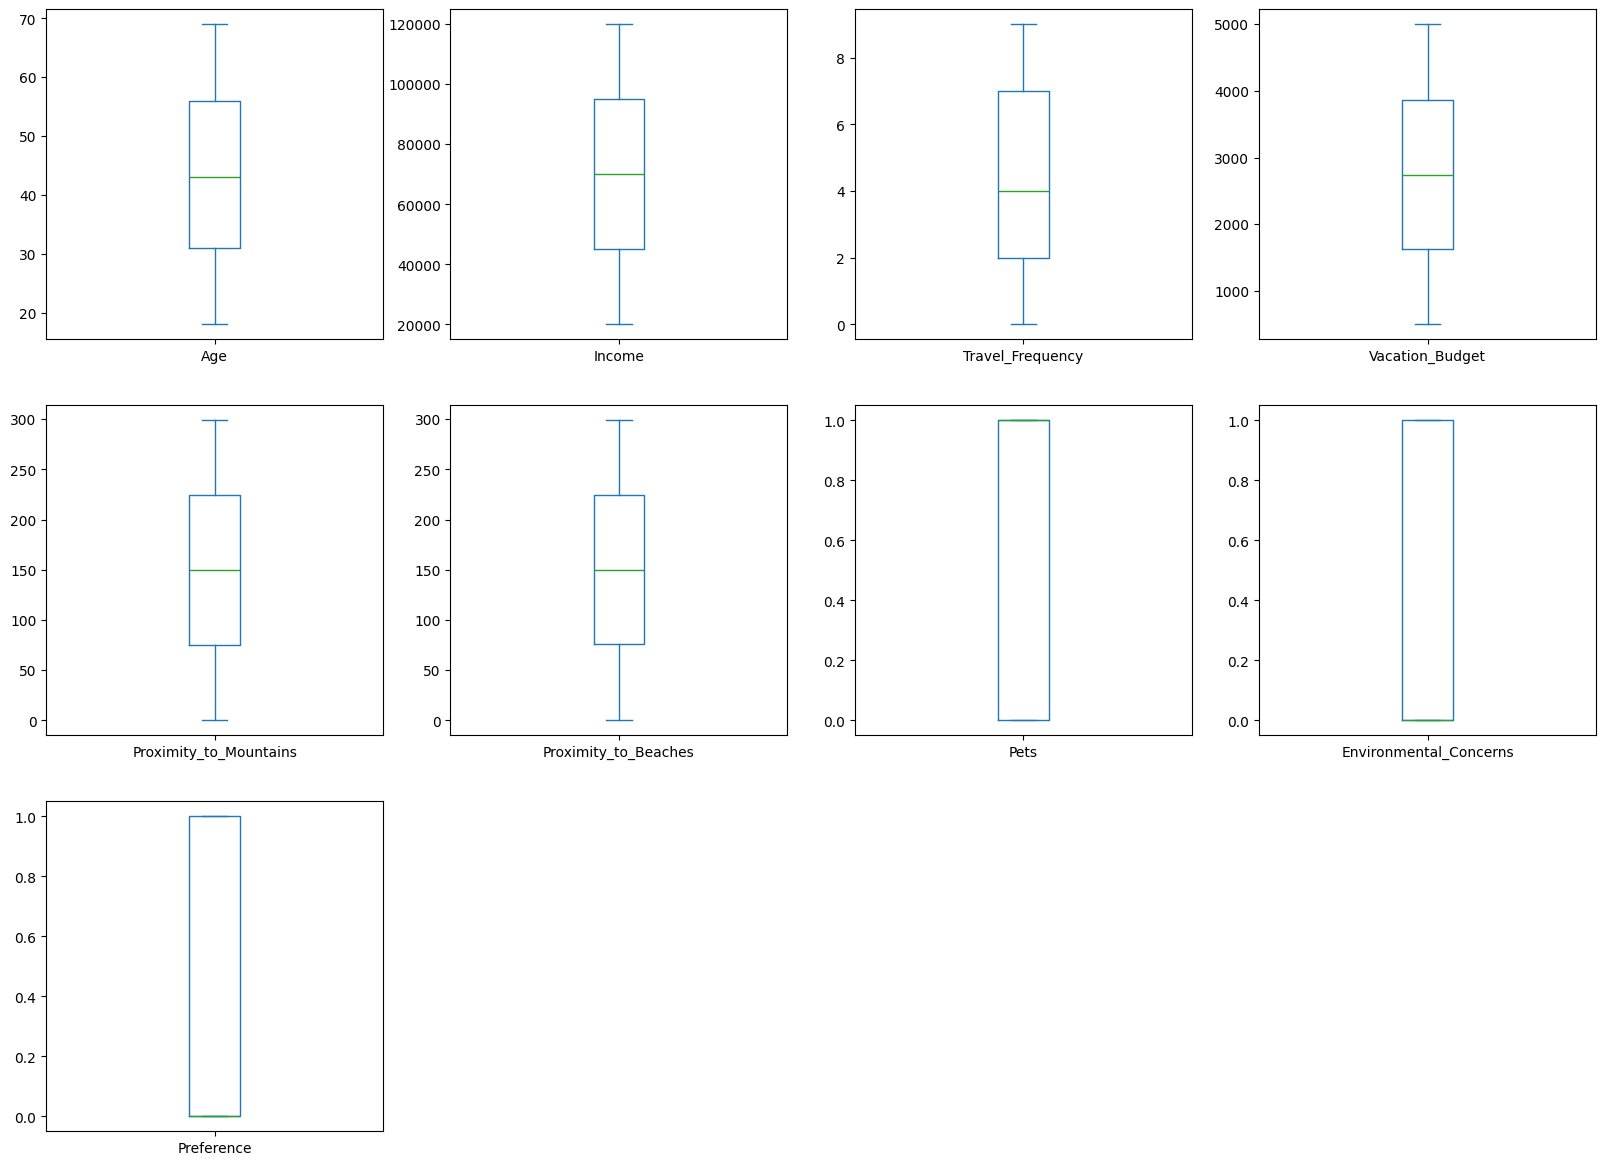

In [6]:
boxPlotAll(df)

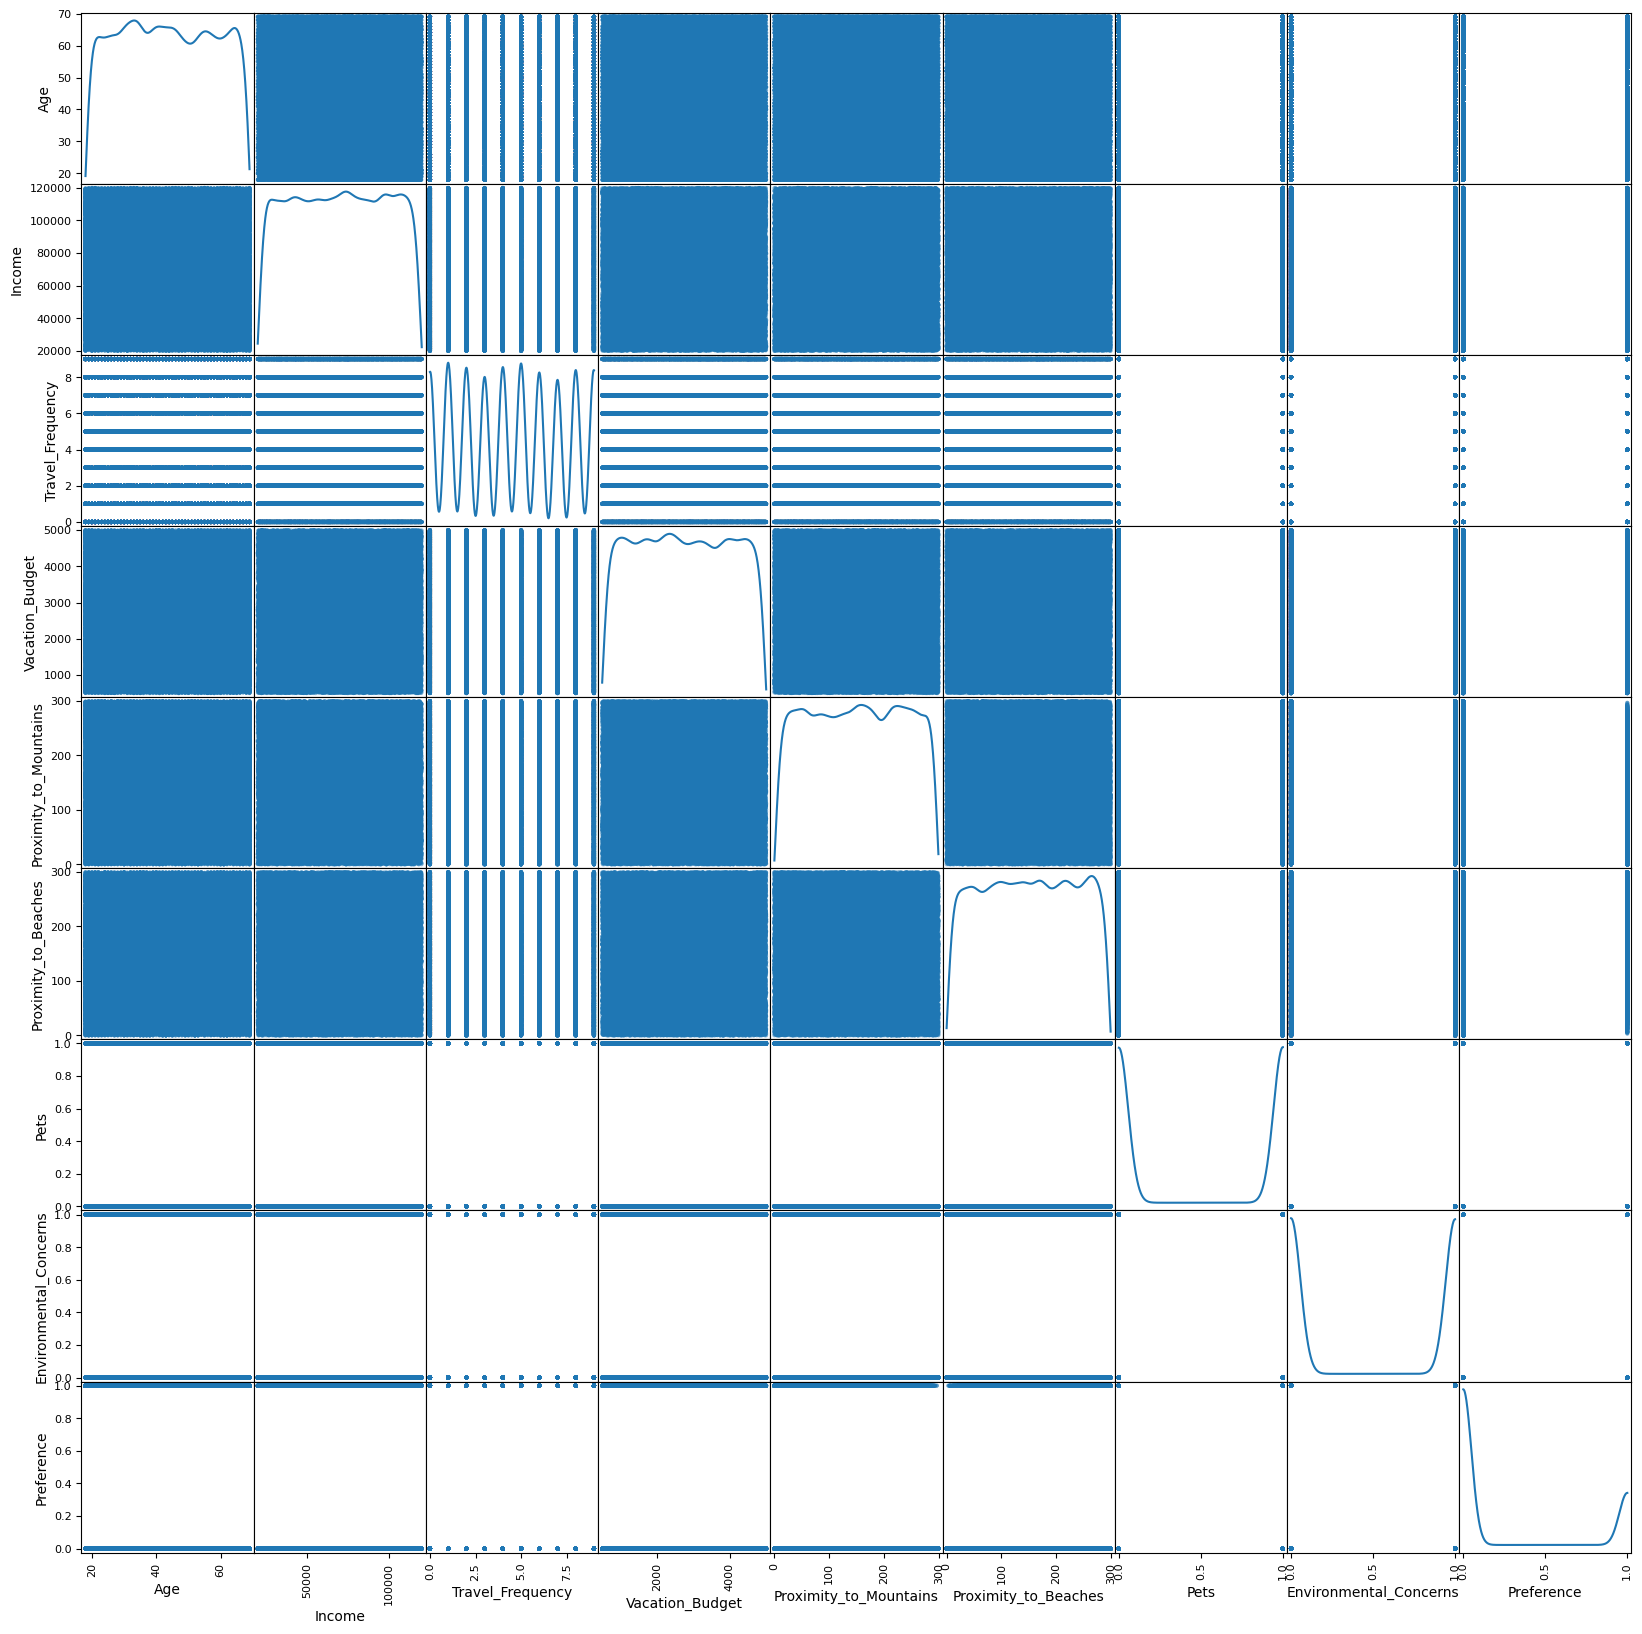

In [7]:
scatterMatrix(df)

In [8]:
# correlationMatrix(df)

In [13]:
categorical_features = []
numerical_features = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)
    else:
        numerical_features.append(column)
    
print('Categorical: ', categorical_features)
print('Numerical: ', numerical_features)

Categorical:  ['Gender', 'Education_Level', 'Preferred_Activities', 'Location', 'Favorite_Season']
Numerical:  ['Age', 'Income', 'Travel_Frequency', 'Vacation_Budget', 'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Pets', 'Environmental_Concerns', 'Preference']


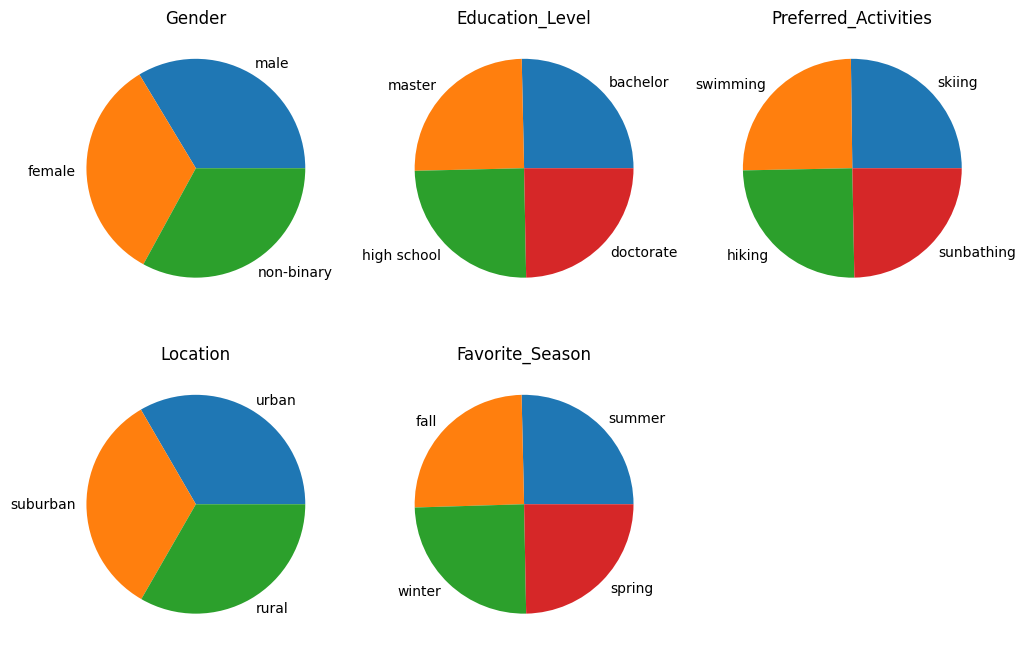

In [33]:
fig = plt.figure(figsize=(12, 8))
num = 1
for feature in categorical_features:
    ax1 = fig.add_subplot(2, 3, num)
    label = list(df[feature].unique())
    ax1.pie(df[feature].value_counts(), labels=label)
    ax1.set_title(feature)
    num += 1

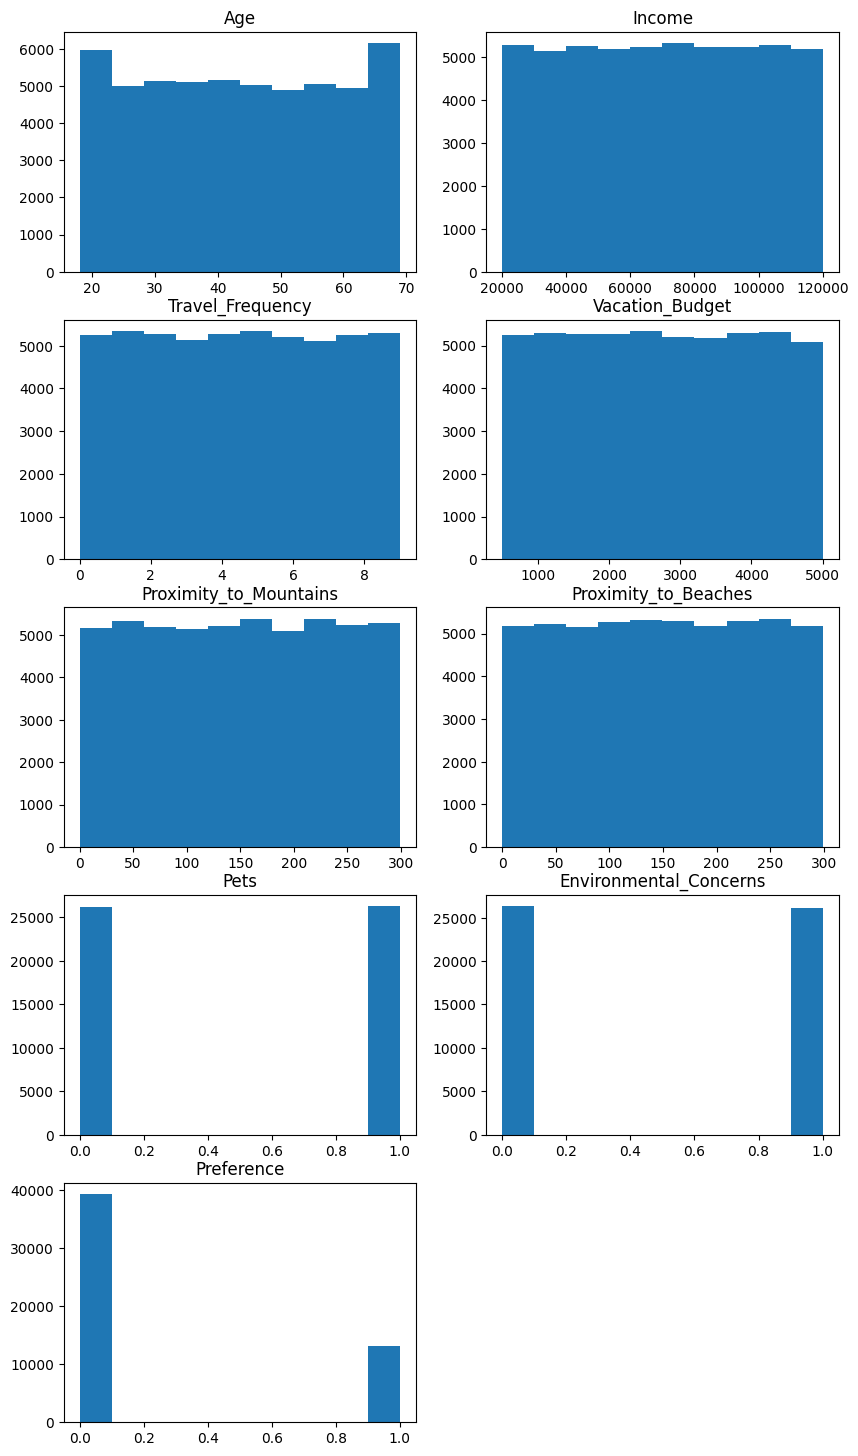

In [34]:
fig = plt.figure(figsize=(10, 33))
num = 1
for feature in numerical_features:
    ax1 = fig.add_subplot(9, 2, num)
    ax1.hist(df[feature])
    ax1.set_title(feature)
    num += 1

In [9]:
df_beaches = df[df['Preference'] == 0]
df_mountains = df[df['Preference'] == 1]
print('Beaches: ', df_beaches.shape)
print('Mountains: ', df_mountains.shape)

Beaches:  (39296, 14)
Mountains:  (13148, 14)


In [16]:
for feature in categorical_features:
    print(df[feature].value_counts())
    print('\n')

Gender
female        17638
male          17522
non-binary    17284
Name: count, dtype: int64


Education_Level
doctorate      13293
bachelor       13127
high school    13072
master         12952
Name: count, dtype: int64


Preferred_Activities
sunbathing    13221
skiing        13167
hiking        13102
swimming      12954
Name: count, dtype: int64


Location
suburban    17503
urban       17476
rural       17465
Name: count, dtype: int64


Favorite_Season
summer    13303
fall      13170
winter    13019
spring    12952
Name: count, dtype: int64




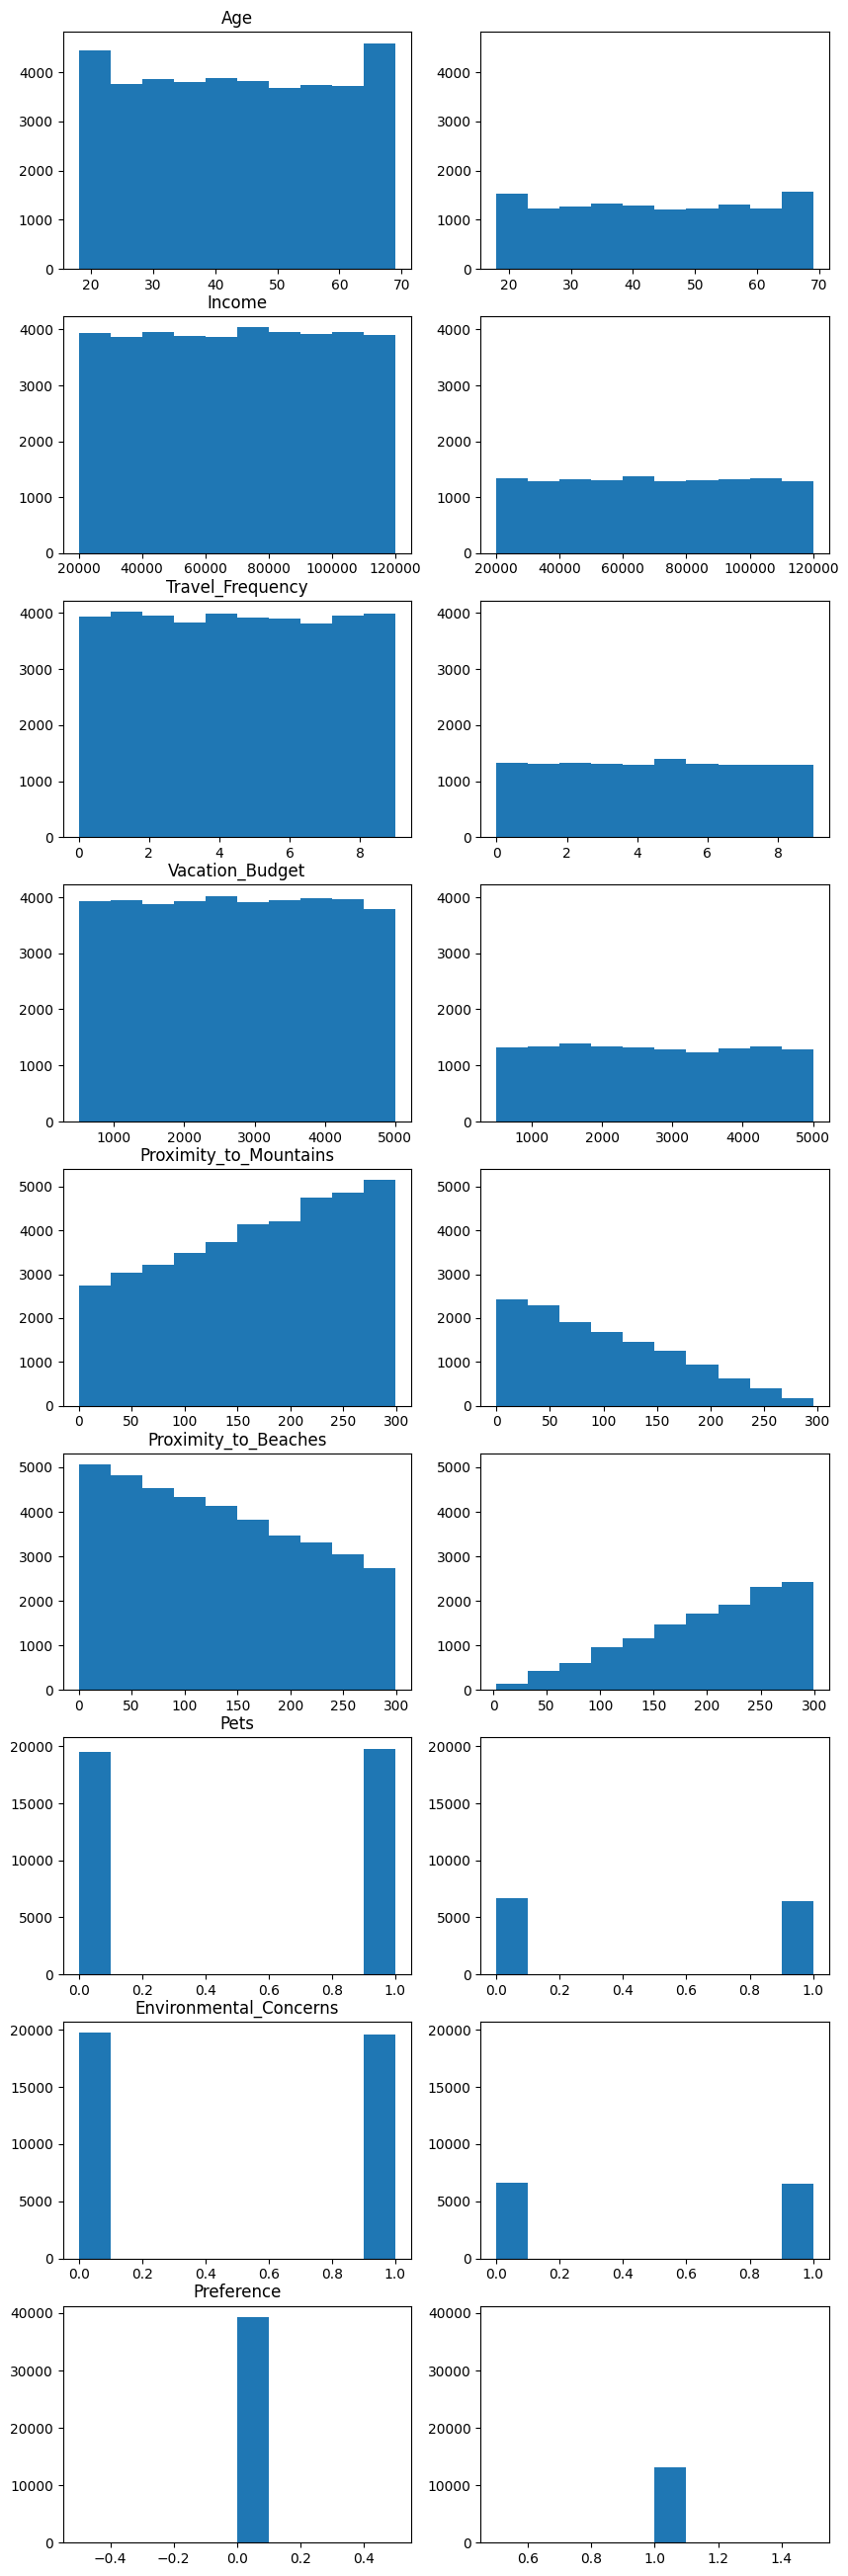

In [ ]:
fig = plt.figure(figsize=(10, 33))
num = 1
for feature in numerical_features:
    ax1 = fig.add_subplot(9, 2, num)
    ax1.hist(df_beaches[feature])
    ax1.set_title(feature)
    num += 1
    ax2 = fig.add_subplot(9, 2, num)
    ax2.hist(df_mountains[feature])
    ax2.set_ylim(ax1.get_ylim())
    num += 1

plt.show()

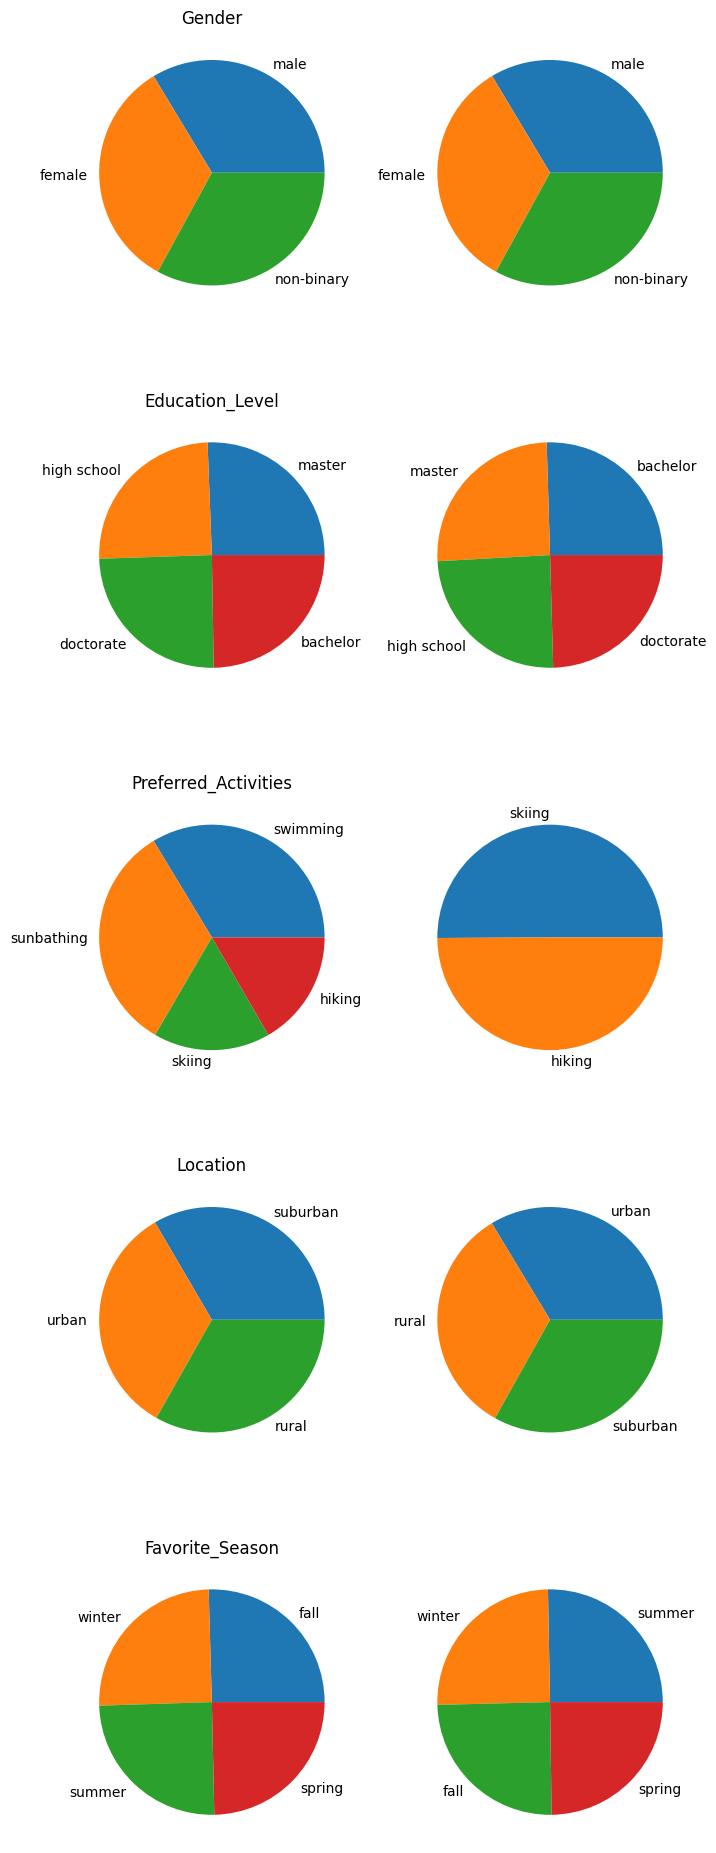

In [30]:
fig = plt.figure(figsize=(8, 24))
num = 1
for feature in categorical_features:
    ax1 = fig.add_subplot(5, 2, num)
    label = list(df_beaches[feature].unique())
    ax1.pie(df_beaches[feature].value_counts(), labels=label)
    ax1.set_title(feature)
    
    num += 1
    ax2 = fig.add_subplot(5, 2, num)
    label = list(df_mountains[feature].unique())
    ax2.pie(df_mountains[feature].value_counts(), labels=label)
    ax2.set_ylim(ax1.get_ylim())
    num += 1

plt.show()